<a href="https://colab.research.google.com/github/Irenee123/LearnMatee/blob/main/Summative_Intro_to_ml_%5BIrenee_Gisubizo_Dusingizimana%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [26]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [27]:
# Mount Google Drive if using Google Colab
from google.colab import drive # Import the necessary library for Google Colab
drive.mount('/content/drive') # Mount your Google Drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Education_numerical.csv')
data.head()

,student_id,math_score,science_score,english_score,history_score,study_hours_week,quiz_attempts,consecutive_logins,material_access_freq,improvement_rate,...,class_size,resource_index,faculty_ratio,peak_study_time,weekend_study_ratio,knowledge_gap,predicted_score,overall_avg,science_math_diff,eng_hist_ratio
0,0,70,63,77,46,7,4,1,8,1.819878,...,28,50,0.061103,20,0.191007,36,56,64,-7,1.67
1,1,63,66,77,56,10,2,1,2,1.280701,...,35,45,0.149986,12,0.437145,37,60,65,3,1.37
2,2,72,64,67,61,24,2,5,5,0.634886,...,25,63,0.064740,22,0.444349,35,77,66,-8,1.10
3,3,83,71,79,69,8,3,11,0,2.160276,...,32,43,0.187442,9,0.714475,30,77,75,-12,1.14
4,4,62,81,63,79,11,5,4,0,2.175565,...,22,37,0.138264,3,0.396244,22,71,71,19,0.80


#SECTION 1: Model Architecture:



```
Image with the Model architecture here.
```

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


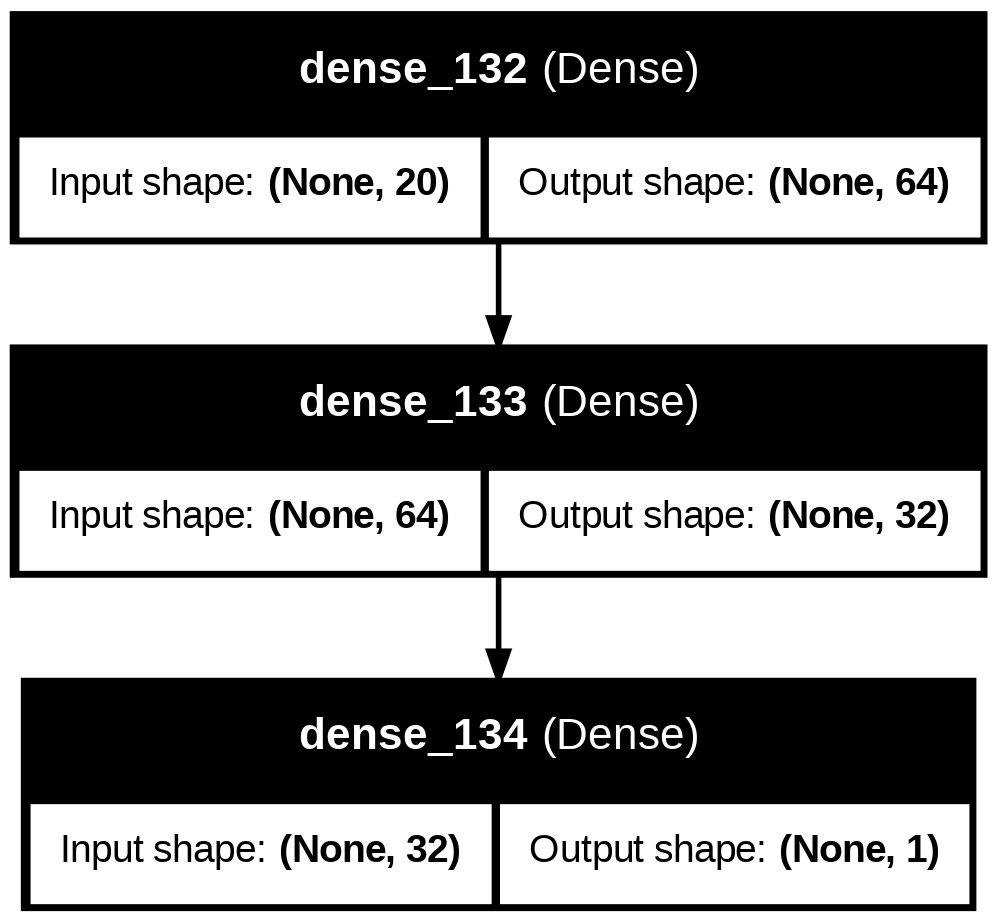

In [29]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(20,), name='dense_132'),
    Dense(32, activation='relu', name='dense_133'),
    Dense(1, activation='sigmoid', name='dense_134')
])

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [30]:
# Data Preprocessing
# For this example, let's predict 'overall_avg' (converted to binary classification)
# We'll consider students with overall_avg >= 70 as "good" (1) and others as "average" (0)
data['target'] = (data['overall_avg'] >= 70).astype(int)

# Select features and target
X = data.drop(['student_id', 'overall_avg', 'target'], axis=1)
y = data['target']

In [31]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [32]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate and plot metrics
def evaluate_model(model, X_test, y_test, model_type='nn'):
    if model_type == 'nn':
        y_pred = (model.predict(X_test) > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) if model_type == 'nn' else roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

In [33]:
# Function to plot loss curves
def plot_loss_curve(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [34]:
# Neural Network Model Definition with Epochs Tracking
def define_model(optimizer=None, regularization=None, early_stopping=False,
                dropout_rate=0.0, learning_rate=0.001, epochs=50):
    model = Sequential()

    # Input layer
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    # Hidden layers with regularization
    if regularization == 'l1':
        reg = l1(0.01)
    elif regularization == 'l2':
        reg = l2(0.01)
    else:
        reg = None

    model.add(Dense(32, activation='relu', kernel_regularizer=reg))

    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Define optimizer
    if optimizer == 'Adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        opt = SGD(learning_rate=learning_rate)
    else:
        opt = 'adam'  # Default

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping
    callbacks = []
    actual_epochs = epochs
    if early_stopping:
        es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        callbacks.append(es)

    history = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=32,
        verbose=0,
        callbacks=callbacks
    )

    # Get actual epochs used if early stopping
    if early_stopping:
        actual_epochs = len(history.history['loss'])

    return model, history, actual_epochs

# Initialize results dictionary
results = []


=== Model 1: Simple Neural Network (No Optimization) ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


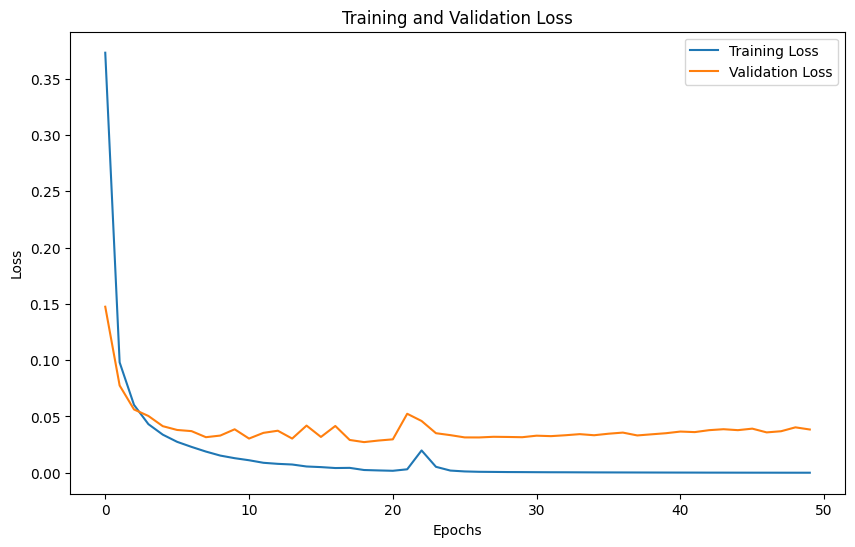

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.9890
Precision: 0.9863
Recall: 0.9886
F1 Score: 0.9874
ROC AUC: 0.9890


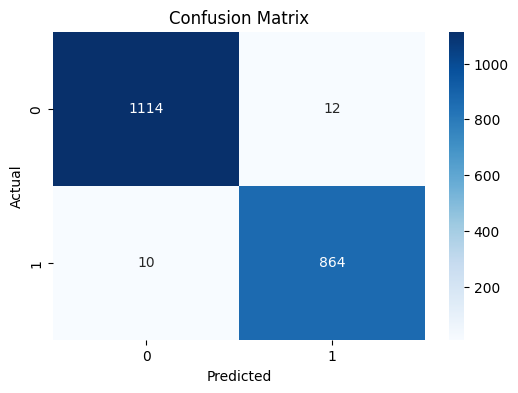

In [35]:
# Model 1: Simple Neural Network (no optimization)
print("\n=== Model 1: Simple Neural Network (No Optimization) ===")
simple_model, simple_history, simple_epochs = define_model(
    epochs=50
)
plot_loss_curve(simple_history)
simple_metrics = evaluate_model(simple_model, X_test_scaled, y_test)
results.append({
    'Model': 'Simple NN',
    'Optimizer': 'Adam (default)',
    'Regularization': 'None',
    'Dropout': 0.001,
    'Learning Rate': 0.0001,
    'Epochs': simple_epochs,
    **simple_metrics
})


=== Model 2: Optimized with Adam ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


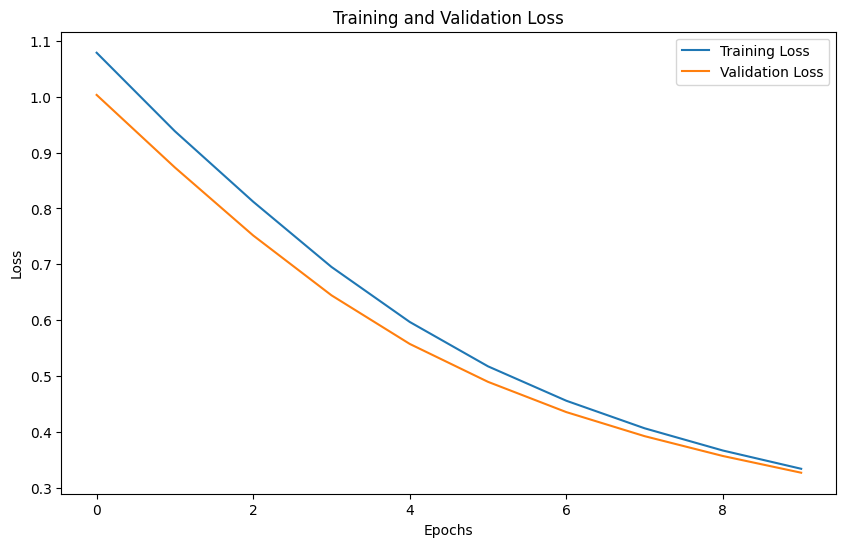

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9635
Precision: 0.9546
Recall: 0.9622
F1 Score: 0.9584
ROC AUC: 0.9634


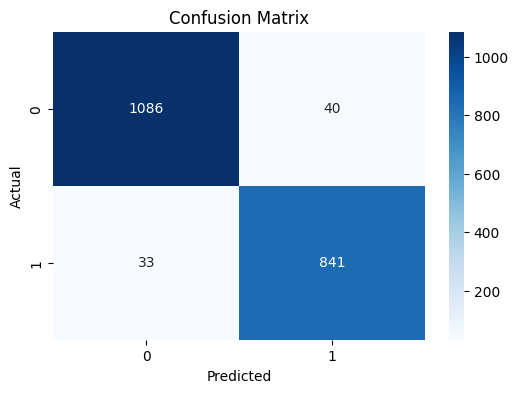

In [36]:
# Model 2: Optimized with Adam
print("\n=== Model 2: Optimized with Adam ===")
opt_model1, opt_history1, epochs1 = define_model(
    optimizer='Adam',
    regularization='l2',
    early_stopping=True,
    dropout_rate=0.01,
    learning_rate=0.0001,
    epochs=10
)
plot_loss_curve(opt_history1)
metrics1 = evaluate_model(opt_model1, X_test_scaled, y_test)
results.append({
    'Model': 'Optimized NN 1',
    'Optimizer': 'Adam',
    'Regularization': 'L2',
    'Early Stopping': True,
    'Dropout': 0.01,
    'Learning Rate': 0.0001,
    'Epochs': epochs1,
    **metrics1
})


=== Model 3: Optimized with RMSprop ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


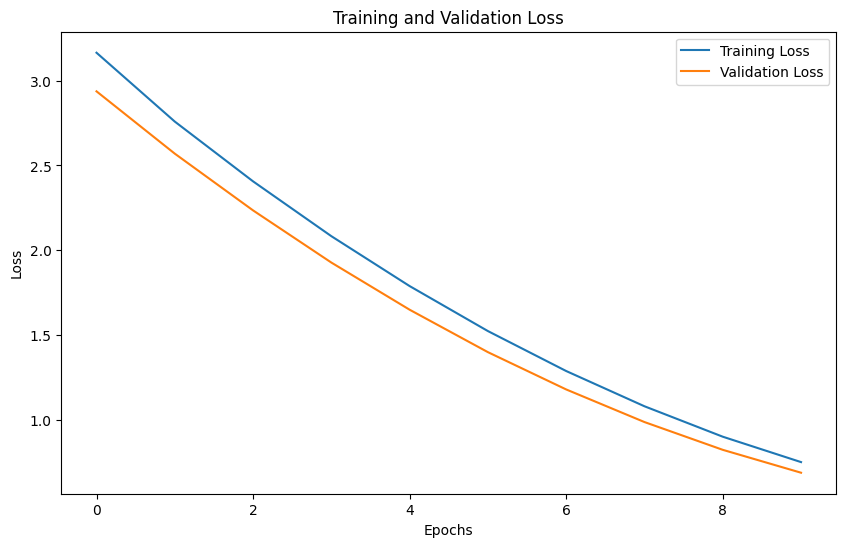

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9620
Precision: 0.9618
Recall: 0.9508
F1 Score: 0.9563
ROC AUC: 0.9607


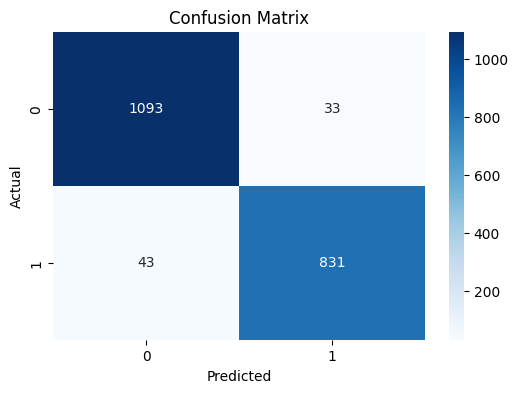

In [37]:
# Model 3: Optimized with RMSprop
print("\n=== Model 3: Optimized with RMSprop ===")
opt_model2, opt_history2, epochs2 = define_model(
    optimizer='RMSprop',
    regularization='l1',
    early_stopping=True,
    dropout_rate=0.02,
    learning_rate=0.0001,
    epochs=10
)
plot_loss_curve(opt_history2)
metrics2 = evaluate_model(opt_model2, X_test_scaled, y_test)
results.append({
    'Model': 'Optimized NN 2',
    'Optimizer': 'RMSprop',
    'Regularization': 'L1',
    'Early Stopping': True,
    'Dropout': 0.02,
    'Learning Rate': 0.0001,
    'Epochs': epochs2,
    **metrics2
})


=== Model 4: Optimized with SGD ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


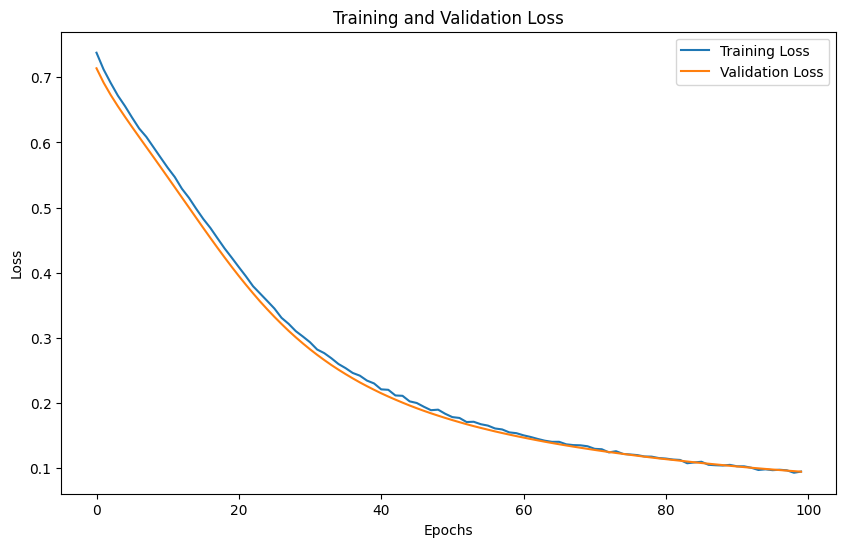

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9740
Precision: 0.9660
Recall: 0.9748
F1 Score: 0.9704
ROC AUC: 0.9741


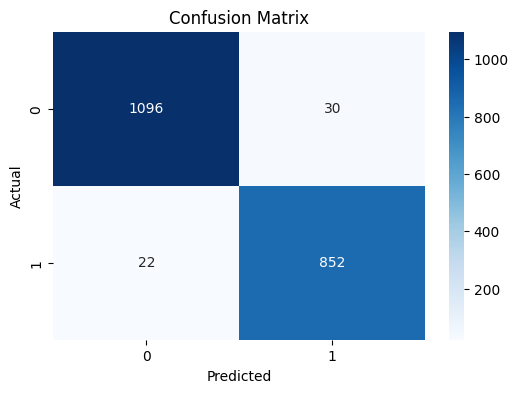

In [38]:
# Model 4: Optimized with SGD
print("\n=== Model 4: Optimized with SGD ===")
opt_model3, opt_history3, epochs3 = define_model(
    optimizer='SGD',
    regularization=None,
    early_stopping=True,
    dropout_rate=0.1,
    learning_rate=0.001,
    epochs=100
)
plot_loss_curve(opt_history3)
metrics3 = evaluate_model(opt_model3, X_test_scaled, y_test)
results.append({
    'Model': 'Optimized NN 3',
    'Optimizer': 'SGD',
    'Regularization': 'None',
    'Early Stopping': True,
    'Dropout': 0.1,
    'Learning Rate': 0.001,
    'Epochs': epochs3,
    **metrics3
})

In [39]:
#Logistic model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test_scaled)

# Evaluate model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)

# 4. Print results
print("=== Logistic Regression Evaluation ===")
print(f"Accuracy:  {logistic_accuracy:.4f}")
print(f"Precision: {logistic_precision:.4f}")
print(f"Recall:    {logistic_recall:.4f}")
print(f"F1 Score:  {logistic_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, logistic_predictions))

=== Logistic Regression Evaluation ===
Accuracy:  0.9995
Precision: 1.0000
Recall:    0.9989
F1 Score:  0.9994

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1126
           1       1.00      1.00      1.00       874

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000




=== Model 5: Logistic model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


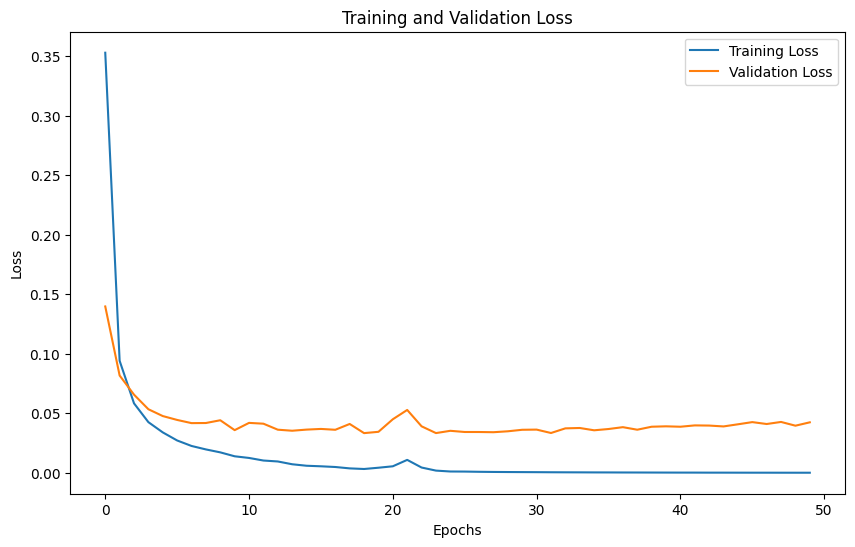

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Accuracy: 0.9910
Precision: 0.9897
Recall: 0.9897
F1 Score: 0.9897
ROC AUC: 0.9909


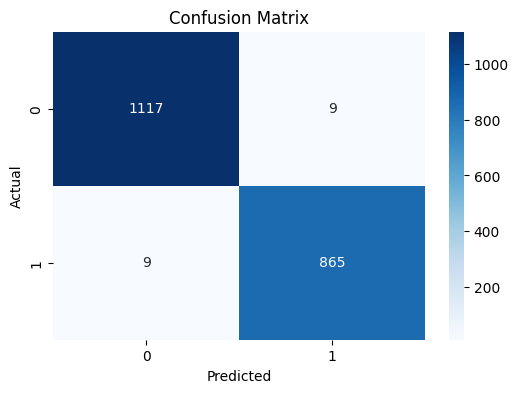

In [40]:
# Model 5: Logistic model

print("\n=== Model 5: Logistic model")
opt_model3, opt_history3, epochs3 = define_model(
    optimizer=None,
    regularization=None,


)
plot_loss_curve(opt_history3)
metrics3 = evaluate_model(opt_model3, X_test_scaled, y_test)
results.append({
    'Model': 'Logistic model',
    'Optimizer': None,
    'Regularization': 'None',

    **metrics3
})

In [41]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n=== Detailed Results Comparison ===")
print(results_df)


=== Detailed Results Comparison ===
            Model       Optimizer Regularization  Dropout  Learning Rate  \
0       Simple NN  Adam (default)           None    0.001         0.0001   
1  Optimized NN 1            Adam             L2    0.010         0.0001   
2  Optimized NN 2         RMSprop             L1    0.020         0.0001   
3  Optimized NN 3             SGD           None    0.100         0.0010   
4  Logistic model            None           None      NaN            NaN   

   Epochs  accuracy  precision    recall        f1   roc_auc Early Stopping  
0    50.0    0.9890   0.986301  0.988558  0.987429  0.988951            NaN  
1    10.0    0.9635   0.954597  0.962243  0.958405  0.963359           True  
2    10.0    0.9620   0.961806  0.950801  0.956272  0.960747           True  
3   100.0    0.9740   0.965986  0.974828  0.970387  0.974093           True  
4     NaN    0.9910   0.989703  0.989703  0.989703  0.990855            NaN  


In [42]:
# Best model based on accuracy from results_df
best_model_info = results_df.loc[results_df['accuracy'].idxmax()]

# Actual best model object
if 'Simple NN' in best_model_info['Model']:
    best_model = simple_model
elif 'Optimized NN 1' in best_model_info['Model']:
    best_model = opt_model1
elif 'Optimized NN 2' in best_model_info['Model']:
    best_model = opt_model2
elif 'Optimized NN 3' in best_model_info['Model']:
    best_model = opt_model3
elif 'Logistic model' in best_model_info['Model']:
    best_model = opt_model3
else:
    # Fallback to simple_model
    best_model = simple_model


# Make predictions on test set
print("\n=== Predictions on Test Set ===")
test_predictions = (best_model.predict(X_test_scaled) > 0.5).astype(int)
print("Sample predictions:", test_predictions[:10])
print("Actual values:", y_test.values[:10])

#  Making predictions on new data
def predict_new_data(model, scaler, new_data):
    """
    Function to preprocess and make predictions on new data
    """
    # new_data has same columns as training data
    new_data = new_data[X.columns]

    # Scale the features
    new_data_scaled = scaler.transform(new_data)

    # Make predictions
    predictions = (model.predict(new_data_scaled) > 0.5).astype(int)
    probabilities = model.predict(new_data_scaled)

    return predictions, probabilities

# Create sample new data )
sample_new_data = X_test.iloc[:5].copy()

# Make predictions
new_predictions, new_probabilities = predict_new_data(best_model, scaler, sample_new_data)

print("\n=== Predictions on New Data ===")
print("Sample new data features:")
print(sample_new_data)
print("\nPredictions:", new_predictions)
print("Probabilities:", new_probabilities)


=== Predictions on Test Set ===
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Sample predictions: [[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
Actual values: [1 0 1 1 0 0 0 0 0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

=== Predictions on New Data ===
Sample new data features:
      math_score  science_score  english_score  history_score  \
6252          96             72             87             63   
4684          52             62             83             73   
1731          60             94             88             68   
4742          65             74             73             81   
4521          77             71             61             59   

      study_hours_week  quiz_attempts  consecutive_logins  \
6252                27              3                   7   
4684                38              6                   8   
1731                18              6                   1   
4742                35              3             

In [43]:
# Describe the best model
print("\n=== Description of the Best Model ===")
print(f"Model Type: {best_model_info['Model']}")
print(f"Optimizer: {best_model_info['Optimizer']}")
print(f"Regularization: {best_model_info['Regularization']}")
print(f"Dropout Rate: {best_model_info['Dropout']}")
print(f"Learning Rate: {best_model_info['Learning Rate']}")
print(f"Epochs Trained: {best_model_info['Epochs']}")
print("\nPerformance Metrics:")
print(f"Accuracy: {best_model_info['accuracy']:.4f}")
print(f"Precision: {best_model_info['precision']:.4f}")
print(f"Recall: {best_model_info['recall']:.4f}")
print(f"F1 Score: {best_model_info['f1']:.4f}")
print(f"ROC AUC: {best_model_info['roc_auc']:.4f}")


=== Description of the Best Model ===
Model Type: Logistic model
Optimizer: None
Regularization: None
Dropout Rate: nan
Learning Rate: nan
Epochs Trained: nan

Performance Metrics:
Accuracy: 0.9910
Precision: 0.9897
Recall: 0.9897
F1 Score: 0.9897
ROC AUC: 0.9909


In [44]:
# Compare models and save the best model

from tensorflow.keras.models import save_model

# Save the best model to the local workspace
best_model_filename = 'best_model.h5'
save_model(best_model, best_model_filename)

print(f"\nBest model saved to: {best_model_filename}")


Best model saved to: best_model.h5



Loaded best model from: best_model.h5

=== Predictions using Loaded Best Model ===
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Sample predictions (loaded model): [[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
Actual values: [1 0 1 1 0 0 0 0 0 0]

=== Evaluating Loaded Best Model ===
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9910
Precision: 0.9897
Recall: 0.9897
F1 Score: 0.9897
ROC AUC: 0.9909


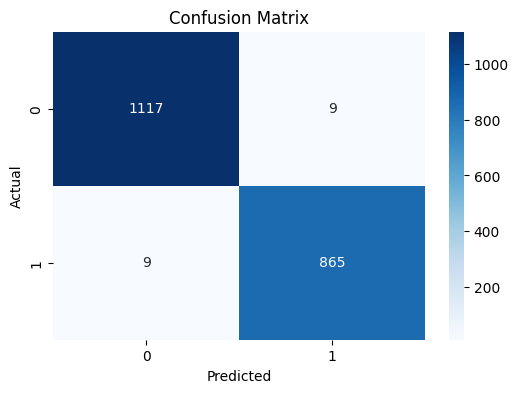

{'accuracy': 0.991,
 'precision': 0.9897025171624714,
 'recall': 0.9897025171624714,
 'f1': 0.9897025171624714,
 'roc_auc': np.float64(0.9908548109791043)}

In [45]:
from tensorflow.keras.models import load_model

# Load the best saved model
# Ensuring path matches where you saved the model
loaded_best_model = load_model(best_model_filename)

print(f"\nLoaded best model from: {best_model_filename}")

# Make predictions using the loaded model
print("\n=== Predictions using Loaded Best Model ===")
loaded_test_predictions = (loaded_best_model.predict(X_test_scaled) > 0.5).astype(int)
print("Sample predictions (loaded model):", loaded_test_predictions[:10])
print("Actual values:", y_test.values[:10])

# Evaluate the loaded model to confirm performance
print("\n=== Evaluating Loaded Best Model ===")
evaluate_model(loaded_best_model, X_test_scaled, y_test, model_type='nn')


In [48]:
# Save each trained model
save_model(simple_model, 'simple_nn_model.h5')
save_model(opt_model1, 'adam_l2_dropout_nn_model.h5')
save_model(opt_model2, 'rmsprop_l1_dropout_nn_model.h5')
save_model(opt_model3, 'sgd_dropout_nn_model.h5')
save_model(opt_model3, 'logistic_model.h5')

print("\nAll models saved to local workspace:")
print("- simple_nn_model.h5")
print("- adam_l2_dropout_nn_model.h5")
print("- rmsprop_l1_dropout_nn_model.h5")
print("- sgd_dropout_nn_model.h5")
print("-logistic_model.h5")


All models saved to local workspace:
- simple_nn_model.h5
- adam_l2_dropout_nn_model.h5
- rmsprop_l1_dropout_nn_model.h5
- sgd_dropout_nn_model.h5
-logistic_model.h5


Congratulations!!
